# Exercise

In [1]:
import numpy as np
from numpy import genfromtxt

1). <code>baseball = genfromtxt('resources/baseball.csv', delimiter=',',
                      encoding="utf-8", dtype=None)
print("Fields: ", baseball[0])
print("First name: ", baseball[1][0])
print("First name: ", baseball[1][0], " has a weight of", 
      baseball[1][4]) </code>

- find out all unique team
- find out all unique position
- average height by team and position (sorted descending)

2). <code> fifa = genfromtxt('resources/fifa.csv', delimiter=',',
                      encoding="utf-8", dtype=None)
print("Fields: ", fifa[0]) </code>

we are scouts who want strikers/forward (A) with left foot, with height
more than 190, with shooting over 75.  Basically, he should be able
to both shoot and head!

3).  Create a function that compute moving average using a sliding
window over a list.  You may want to perform a bit of research what is moving average

For example, <code>moving_average([1,2,5,10], n=2)</code> should produce
        
        [1.5 3.5 7.5]

4).
<code>#Read a digits image and split it up in different training examples
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('resources/digits.png', 0)
plt.imshow(img)
print(img.shape)</code>

- first, our img is a numpy array, attempt to break into 100 letters 

- commonly, we break our dataset to training and testing set.  If our dataset is small, then probably testing should be around 30% then the rest is training set.  When our dataset is really big, 5% for testing set suffice.  Here our dataset is quite small, so attempt to break into 30% testing set, and 70% training set. Result should be X_train, X_test, y_train, y_test.  Code from scratch!

5)  Create a set of 100 points that follow the function   

$$f(x) = 0.5x + 1$$

- first, add gaussian white noise to the result using np.random.normal
- second, use polyfit to fit the results in a line and plot them using
  <code>
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')  #blue dots
plt.plot(X, coeff[1] + coeff[0]*X, 'r')  #overlay the line</code>
- third, perform linear regression with ordinary least squares using the closed-form expression matrix formula $$\mathbf{w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$  See whether we can get back the coefficients 1 and 0.5.  FYI: To invert a matrix, use <code>np.linalg.inv</code>

6). 
<code>iris = genfromtxt('resources/iris.csv', delimiter=',',
                      encoding="utf-8", dtype=None)
iris_without_headers = np.array(iris[1:])
species = iris_without_headers[:, 5]
sepal_length = iris_without_headers[:, 1].astype(float)
petal_length = iris_without_headers[:, 3].astype(float)
print("Fields: ", iris[0]) </code>

- calculate how many samples of data we have
- get all unique species
- compute the mean and std of sepal length of each species
- retrieve data with sepal length less than 5, and petal length greater than 1.5
- Check if any missing values in the whole data
- find correlation between sepal and petal length
- let's perform logistic regression.  For fun, implement from scratch!(Do not use scikit learn!).  Define X as sepal length and Y as 0, 1

7). Implement a simple perceptron using Numpy on the given file and output the trained weights, attempt to measure the accuracy of this trained weights.  Use a simple stochastic gradient descent method in which the model make prediction at each training instance where error is calculated.  Then the model is updated in order to reduce the error for the next prediction.  This procedure can be used fo find the set of weights in a model that result in the smallest error.  The formula is as follows:

<code>w = w + learning_rate * (expected - predicted) * x #for x
w = w + learning_rate * (expected - predicted) #for bias</code>

Here is the initial code:

<code>data = np.genfromtxt('resources/perceptron.csv', delimiter=',', skip_header=1)
X = data[:, :-1]
y = data[:, -1]
cond0 = y==0
cond1 = y==1
plt.plot(X[:,0][cond0], X[:,1][cond0], 'o', mec='r', mfc='none')
plt.plot(X[:,0][cond1], X[:,1][cond1], 'o', mec='g', mfc='none')</code>


# Solution

In [2]:
#1
baseball = genfromtxt('resources/baseball.csv', delimiter=',',
                      encoding="utf-8", dtype=None)

print("Fields: ", baseball[0])
print("First name: ", baseball[1][0])
print("First name: ", baseball[1][0], " has a weight of", 
      baseball[1][4])

baseball_without_header = baseball[1:]

#find out all unique team
team = baseball_without_header[:, 1]

print("Teams: ", set(team))
print("Number of teams: ", len(set(team)))  #you can also do np.unique

#find out all unique position
pos = baseball_without_header[:, 2]

print("Positions: ", set(pos))
print("Number of positions: ", len(set(pos)))

#average height by team and position (sorted descending)
print("Average height: ", baseball_without_header[:, 3].astype(float).mean())

height_info = []
for each_pos in set(pos):
    height = baseball_without_header[pos==each_pos, 3].astype(float).mean()
    height_info.append([height, each_pos])

#create numpy for easy indexing using np.vstack
height_info_numpy = np.vstack(height_info)

#use ::-1 for printing in reverse order
print("Sorted height in desc order: ", np.sort(height_info_numpy, axis=0)[::-1])

Fields:  ['"Name"' '"Team"' '"Position"' '"Height"' '"Weight"' '"Age"'
 '"PosCategory"']
First name:  "Adam_Donachie"
First name:  "Adam_Donachie"  has a weight of 180
Teams:  {'"SD"', '"KC"', '"ARZ"', '"STL"', '"BOS"', '"NYM"', '"NYY"', '"BAL"', '"ANA"', '"MIN"', '"CWS"', '"DET"', '"ATL"', '"SEA"', '"LA"', '"PIT"', '"SF"', '"HOU"', '"TOR"', '"CHC"', '"FLA"', '"WAS"', '"CIN"', '"OAK"', '"CLE"', '"TB"', '"TEX"', '"MLW"', '"COL"', '"PHI"'}
Number of teams:  30
Positions:  {'"Catcher"', '"Starting_Pitcher"', '"Outfielder"', '"First_Baseman"', '"Shortstop"', '"Second_Baseman"', '"Relief_Pitcher"', '"Third_Baseman"'}
Number of positions:  8
Average height:  73.6896551724138
Sorted height in desc order:  [['74.73181818181818' '"Third_Baseman"']
 ['74.37460317460318' '"Starting_Pitcher"']
 ['74.0' '"Shortstop"']
 ['73.04444444444445' '"Second_Baseman"']
 ['73.01030927835052' '"Relief_Pitcher"']
 ['72.72368421052632' '"Outfielder"']
 ['71.90384615384616' '"First_Baseman"']
 ['71.36206896551724

In [3]:
#2
fifa = genfromtxt('resources/fifa.csv', delimiter=',',
                      encoding="utf-8", dtype=None)
print("Fields: ", fifa[0])

#we are scouts who want strikers/forward (A) with left foot, with height
#more than 190, with shooting over 75.  Basically, he should be able
#to both shoot and head!
fifa_without_header = np.array(fifa[1:])

#remove some strange trailing whitespace
fifa_without_header_cleaned = np.char.lstrip(fifa_without_header)
pos = fifa_without_header_cleaned[:, 3]
cond_pos = pos == "A"

filtered_pos = fifa_without_header_cleaned[cond_pos]
foot = filtered_pos[:, 5]
cond_foot = foot == "Left"

filtered_pos_foot = filtered_pos[cond_foot]
height = filtered_pos_foot[:, 4].astype(float)
cond_height = height >= 190

filtered_pos_foot_height = filtered_pos_foot[cond_height]
shoot = filtered_pos_foot_height[:, 8].astype(float)
cond_shoot = shoot > 75

filtered_pos_foot_height_shoot = filtered_pos_foot_height[cond_shoot]

print("Here is our scouted list boss: ", filtered_pos_foot_height_shoot)


Fields:  ['id' ' name' ' rating' ' position' ' height' ' foot' ' rare' ' pace'
 ' shooting' ' passing' ' dribbling' ' defending' ' heading' ' diving'
 ' handling' ' kicking' ' reflexes' ' speed' ' positioning']
Here is our scouted list boss:  [['106019' 'Adriano' '77' 'A' '190' 'Left' '0' '62' '80' '52' '71' '59'
  '67' '' '' '' '' '' '']
 ['138384' 'Marc Janko' '75' 'A' '196' 'Left' '1' '38' '76' '47' '58'
  '56' '65' '' '' '' '' '' '']
 ['178509' 'Olivier Giroud' '76' 'A' '192' 'Left' '1' '63' '77' '64' '67'
  '60' '85' '' '' '' '' '' '']
 ['179752' 'Óscar Cardozo' '81' 'A' '192' 'Left' '1' '42' '85' '71' '73'
  '63' '77' '' '' '' '' '' '']
 ['200647' 'Josip Iličić' '79' 'A' '190' 'Left' '1' '71' '81' '80' '81'
  '64' '49' '' '' '' '' '' '']]


In [4]:
#3
data = [1, 2, 5, 10]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    #we modify [n:] so that it only contains first previous n values accumulation
    ret[n:] = ret[n:] - ret[:-n]
    #we ignore n-1 value since they cannot calculate moving average
    return ret[n - 1:] / n

print(moving_average([1,2,5,10], n=2))

#we can also use numpy.convolve
def moving_average_convolve(data, n=3):
    weights = np.ones(n) / n
    #mode='valid' make sure our value lies where signal overlap completely
    #Basically, mode ‘valid’ returns output of length max(len(weights), len(data)) - min(len(weights), len(data)) + 1
    #4-2+1 = 3, thus the resulting list is of length 3
    return np.convolve(data, weights, mode='valid')

print(moving_average_convolve(data, n=2))

#convolve basically do this:
'''
 [1,   2,   5,  10]
 [0.5, 0.5]            #(actually need to reverse this, but reverse of it look the same) #without reverse, we call correlation
  -->  1*0.5 + 2*0.5 = 1.5
  
 [1,   2,   5,  10]
     [0.5, 0.5]            #(actually need to reverse this, but reverse of it look the same) #without reverse, we call correlation
  2*0.5 + 5*0.5 = 3.5

  [1,   2,   5,  10]
           [0.5, 0.5]            #(actually need to reverse this, but reverse of it look the same) #without reverse, we call correlation
  5*0.5 + 10*0.5 = 7.5

Explanation:
The running mean is a case of the mathematical operation of convolution. 
For the running mean, you slide a window along the input and compute the mean of the window's contents. 
For discrete 1D signals, convolution is the same thing, except instead of the mean you compute an arbitrary 
linear combination, i.e. multiply each element by a corresponding coefficient and add up the results. 
Those coefficients, one for each position in the window, are sometimes called the convolution kernel. \
Now, the arithmetic mean of N values is (x_1 + x_2 + ... + x_N) / N, so the corresponding kernel 
is (1/N, 1/N, ..., 1/N), and that's exactly what we get by using np.ones((N,))/N.

Convolution is very very essential in many areas, such as fourier transform for eeg signals or image filtering
In fourier transform, you can think of first vector as composed signal, and second vector
is a sinusoidal curve function of a particular frequency, by convoluting them together,
you can get the signal with only that particular frequency.  Think of music, by convoluting
it with frequency 1-10Hz, you get only the sound with 1-10hz (just like what you do in a video-editing progrma)
'''



[1.5 3.5 7.5]
[1.5 3.5 7.5]


"\n [1,   2,   5,  10]\n [0.5, 0.5]            #(actually need to reverse this, but reverse of it look the same) #without reverse, we call correlation\n  -->  1*0.5 + 2*0.5 = 1.5\n  \n [1,   2,   5,  10]\n     [0.5, 0.5]            #(actually need to reverse this, but reverse of it look the same) #without reverse, we call correlation\n  2*0.5 + 5*0.5 = 3.5\n\n  [1,   2,   5,  10]\n           [0.5, 0.5]            #(actually need to reverse this, but reverse of it look the same) #without reverse, we call correlation\n  5*0.5 + 10*0.5 = 7.5\n\nExplanation:\nThe running mean is a case of the mathematical operation of convolution. \nFor the running mean, you slide a window along the input and compute the mean of the window's contents. \nFor discrete 1D signals, convolution is the same thing, except instead of the mean you compute an arbitrary \nlinear combination, i.e. multiply each element by a corresponding coefficient and add up the results. \nThose coefficients, one for each position i

(80, 80)


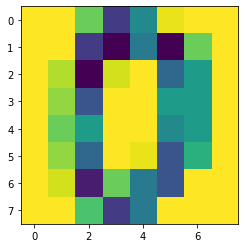

In [5]:
#4
#Read a digits image and split it up in different training examples
import cv2
import matplotlib.pyplot as plt

#0 means gray scale
img = cv2.imread('resources/digits.png', 0)
plt.imshow(img)

print(img.shape)

#img is a numpy array, attempt to break into 100 letters

X = []
#8 pixels for each letter since  80 pixels /10 letters = 8
for i in range(0, img.shape[0], 8):
    for j in range(0, img.shape[1], 8):
        X.append(img[i:i+8, j:j+8])
        
X = np.array(X)
        
#view the first 0
plt.imshow(X[0])

#view the last 9 of the last column
#plt.imshow(data[99])

#commonly, we break our dataset to training and testing set
#if our dataset is small, then probably testing should be around 30% then the rest is training set
#if our dataset is really big, 5% for testing set suffice
#here our dataset is quite small, so attempt to break into 30% testing set, and 70%training set
#result should be X_train, X_test, y_train, y_test 
#Code from scratch!

y = np.zeros(X.shape[0])
for idx, i in enumerate(range(10, y.shape[0], 10)):
    y[i:i+10] = idx + 1

def test_train_split(X, y, size=0.3):
    #do some shuffling
    assert len(X) == len(y)
    shuffle_X = np.empty(X.shape, dtype=X.dtype)
    shuffle_y = np.empty(y.shape, dtype=y.dtype)
    permutation = np.random.permutation(len(X))
    for old_idx, new_idx in enumerate(permutation):
        shuffle_X[new_idx] = X[old_idx]
        shuffle_y[new_idx] = y[old_idx]
    
    #get split index and slice
    idx = int(X.shape[0] * size)
    X_train, X_test = shuffle_X[:idx], shuffle_X[idx:]
    y_train, y_test = shuffle_y[:idx], shuffle_y[idx:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = test_train_split(X, y, size=0.3)

Weights:  [0.97258362 0.49767773]


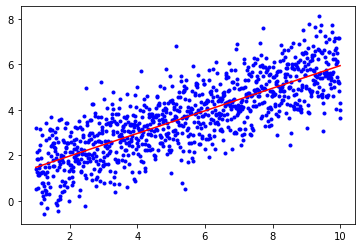

In [6]:
#5  Create a set of 100 points that follow the function
#                      f(x) = 0.5x + 1

import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(1, 10, 1000)

#then add gaussian white noise to the result using np.random.normal
def f(X):
    return 0.5*X + 1 + np.random.normal(size=X.shape[0])

y = f(X)

#use polyfit fo fit the results in a line and plot them
coeff = np.polyfit(X, y, 1)  #1 for linear reg 
plt.plot(X, y, 'b.')  #blue dots
plt.plot(X, coeff[1] + coeff[0]*X, 'r')  #overlay the line

#for the sake of practice
#let's perform linear regression with ordinary least squares using
#the closed-form expression matrix formula.  See whether we
#can get back the coefficients 1 and 0.5
#FYI: To invert a matrix, use np.linalg.inv
#for the marix formula, it's (X.T dot X)^-1 dot X.T dot Y 
#or see https://en.wikipedia.org/wiki/Linear_regression
def linear_reg(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

#make X in the form of (samples, features)
X = X[:, np.newaxis]

#add intercept to X
intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)

#now our X is in the form, so that it can be multiplied with weights
#[ 1  x1
#  1  x2
#  1  x3
#  1  x4
# .
# .       ] *  [WeightforB0,
#                WeightforB1]

#if you do not understand this part, see
##https://en.wikipedia.org/wiki/Design_matrix 

weights = linear_reg(X, y)
print("Weights: ", weights)  #yay, seems like our 0.9 is close to 1, and 0.515 is close to 0.5


In [7]:
#6
iris = genfromtxt('resources/iris.csv', delimiter=',',
                      encoding="utf-8", dtype=None)

iris_without_headers = np.array(iris[1:])
species = iris_without_headers[:, 5]
sepal_length = iris_without_headers[:, 1].astype(float)
petal_length = iris_without_headers[:, 3].astype(float)

print("Fields: ", iris[0])

#calculate how many samples of data we have
print("Rows: ", len(iris_without_headers))
print("Rows: ", np.array(iris_without_headers).shape[0])

#get all unique species
print("Unique species: ", set(species))

#compute the mean and std of sepal length of each species
for spec in set(species):
    cond = species == spec
    print(spec, end=": ")
    mean = iris_without_headers[cond][:, 1].astype(float).mean()
    print(mean)
    
##Here you will see that sepal length seems to be a good predictor
##for each class

#just for the sake of practicing boolean masking
#retrieve data with sepal length less than 5, and petal length 
#greater than 1.5
cond1 = petal_length > 1.5
cond2 = sepal_length < 5
filtered_iris = iris_without_headers[cond1 & cond2]
print("Filtered iris: ", filtered_iris)

#Check if any missing values in the whole data
print("Any missing values?: ", np.isnan(petal_length).sum())  #seems no, rejoice!

#find correlation between sepal and petal length
from scipy.stats.stats import pearsonr  
corr, p_value = pearsonr(sepal_length, petal_length)
print(f"Correation of {corr} and p_value of {p_value}")

##Seems i=like sepal and petal length has high correlation,
##thus if we want to predict, probably use either is enough

#let's create our X as noramlized sepal length 
#in many algorithms, especially distance based, normalizing data can yield better results
#normalize the sepal length such that max value has value 1 and min value has value 0
#formula is this x ′ = ( x − x m i n ) / ( x m a x − x m i n )
#then make sure to reshape this X to the form (samples, features)
normalized_sepal_length = (sepal_length - np.min(sepal_length))/(np.max(sepal_length) - np.min(sepal_length))
X = normalized_sepal_length[:, np.newaxis]

##also add some intercept for our X
intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)

##create your y, taking species as labels
##notice that my y is small char, and it should be in the shape of
##(samples, )  ##easy way is to use squeeze
y = np.squeeze(iris_without_headers[:, 5])
y[y=='Iris-setosa'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(int)

##let's perform logistic regression.  For fun, implement from scratch!(Do not use scikit learn!)
##define X as sepal length and Y as 0, 1, where 0 for 
##let's define some function, first is the sigmoid function
##if you are not familiar with logistic regression, read a bit
def sigmoid(X, weight):
    hx = np.dot(X, weight)
    return 1 / (1 + np.exp(-hx))

##let's define a loss function so we can do some gradient descent on it
##fx is our sigmoid output, and y is the actual y
def loss(fx, y):
    #.mean for 1/n
    return (-y * np.log(fx) - (1 - y) * np.log (1-fx)).mean()

##let's create a function to predict the class then
def predict(X, weight):
    return sigmoid(X, weight) >= 0.5

#let's do some predictions

#weights initialization; you can actually randomize...
weight = np.zeros(X.shape[1])
lr = 0.1  #learning rate

##let's do gradient descent for 1000 times
for i in range(1000):
    fx = sigmoid(X, weight)
    ##let's define a gradient descent formula, and update
    ##which basically is the partial derivatives of the loss function
    gradient = np.dot(X.T, (fx-y)) / y.shape[0]
    weight -= lr * gradient

print(weight)
print(f"loss: {loss(fx, y)}")

#accuracy  ##we later will discuss why this method is bad since we could be overfitting
prediction = predict(X, weight)
print("Accuracy: ", (prediction == y).mean())

Fields:  ['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'
 'Species']
Rows:  100
Rows:  100
Unique species:  {'Iris-setosa', 'Iris-virginica'}
Iris-setosa: 5.006
Iris-virginica: 6.587999999999998
Filtered iris:  [['12' '4.8' '3.4' '1.6' '0.2' 'Iris-setosa']
 ['25' '4.8' '3.4' '1.9' '0.2' 'Iris-setosa']
 ['30' '4.7' '3.2' '1.6' '0.2' 'Iris-setosa']
 ['31' '4.8' '3.1' '1.6' '0.2' 'Iris-setosa']
 ['107' '4.9' '2.5' '4.5' '1.7' 'Iris-virginica']]
Any missing values?:  0
Correation of 0.9047958050294632 and p_value of 4.1155959453122893e-38
[-2.12889688  5.45877571]
loss: 0.3147901138532218
Accuracy:  0.96


Accuracy:  1.0


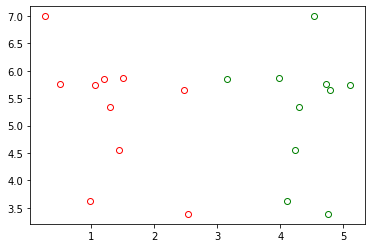

In [8]:
#7 Implement a simple perceptron using Numpy on the given file
# and output the trained weights, attempt to measure the accuracy
# of this trained weights.  
# Use a simple stochastic gradient descent method in which
#the model make prediction at each training instance where
#error is calculated.  Then the model is updated in order
#to reduce the error for the next prediction
#this procedure can be used fo find the set of weights
#in a model that result in the smallest error.  The formula is as follows:

# w = w + learning_rate * (expected - predicted) * x

# Does not require splitting train-test set for simplicity
data = np.genfromtxt('resources/perceptron.csv', delimiter=',', skip_header=1)

X = data[:, :-1]
y = data[:, -1]

#we can do this, because X and y has same length
cond0 = y==0
cond1 = y==1

#mec: marker edge color; mfc: marker face color
plt.plot(X[:,0][cond0], X[:,1][cond0], 'o', mec='r', mfc='none')
plt.plot(X[:,0][cond1], X[:,1][cond1], 'o', mec='g', mfc='none')

def predict(row, w):
    #will be run for each training instance
    #negative - classify as 0 class
    if np.dot(w[1:], row) + w[0] < 0:
        return 0
    else:
        return 1

def get_preds(X, w):
    preds = np.squeeze(np.dot(X, w[1:, np.newaxis]) + w[0])
    return preds > 0 

def fit(X, y):
    num_feature = X.shape[1]
    w = np.zeros(num_feature+1)  #bias, w1, w2
    l_rate = 0.1
    iteration = 1000
    for i in range(iteration):
        #loop through each X pairs
        for j in range(X.shape[0]):
            #predict using the w
            ypred = predict(X[j], w)
            yactual = y[j]
            error = yactual - ypred
            #Weights are updated based on the error the model made.
            w[0] += l_rate * error  #updating bias
            w[1:] += l_rate * error * X[j]  #updating w1, w2
    return w
                
w = fit(X, y)
pred = get_preds(X, w)
print("Accuracy: ", (pred == y).mean())

#getting 1 is not a surprise, since we know all training data
#thus it is better to have separate test training set